In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, DivergingNorm
import matplotlib.colors as colors
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from scipy.optimize import curve_fit
from scipy.interpolate import interp2d, interp1d
from os import path
import colorcet as cc   # install quickly with "conda install colorcet"
from scipy.interpolate import RectBivariateSpline
from matplotlib import ticker
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from lmfit import Model
import scipy.signal.windows as windows
from matplotlib.lines import Line2D
import lmfit

In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'  # with this, we need to raster the pcolormesh images with rasterized=True
# and save with .svg in the filename. don't worry. The annoying white line/offset in the image doesn't seem to show up if you use dpi=something while saving

In [3]:
# plt.rcParams['font.sans-serif'] = ['Arial',  # make Arial the standard font
#  'DejaVu Sans',
#  'Bitstream Vera Sans',
#  'Computer Modern Sans Serif',
#  'Lucida Grande',
#  'Verdana',
#  'Geneva',
#  'Lucid',
#  'Helvetica',
#  'Avant Garde',
#  'sans-serif']

# plt.rcParams['font.size'] = 12

font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [4]:
# %matplotlib widget

In [5]:
# %matplotlib notebook  # this is what I started out using  # or %matplotlib widget in jupyter lab

In [6]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [7]:
qc.DataSet.default_io.base_location = path.abspath('.')
figfile = path.abspath('.') + '/Figures/200901_S3_graphs/'
dfile = path.abspath('.') + '/data/S3_Peak_data/'

In [8]:
muB = 9.274e-24
kB = 1.381e-23

All on contacts 35-34

# T-dependence

Look at 35-34

In [27]:
a = 0.246e-9
Vgatefull = 2.35
V0 = -0.79

sl = 32
nfull = Vgatefull*sl*1.602e-19/6.626e-34/10**4
theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('nfull: {:.3f} *10^12 cm^-2'.format(nfull/10**12))
print('Theta: {:.3f} degrees'.format(theta))

nfull: 1.818 *10^12 cm^-2
Theta: 0.884 degrees


In [9]:
data_D0_T_base = qc.load_data('data/2020-09-05/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT_21-39-49')
data_D0_T_1 = qc.load_data('data/2020-09-05/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K_21-59-28')
data_D0_T_2 = qc.load_data('data/2020-09-06/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K_08-51-18')
data_D0_T_3 = qc.load_data('data/2020-09-06/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K_10-53-21')
data_D0_T_4 = qc.load_data('data/2020-09-06/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K_14-00-29')
data_D0_T_5 = qc.load_data('data/2020-09-07/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K_10-15-14')
data_D0_T_6 = qc.load_data('data/2020-09-07/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K_21-03-39')
vg = data_D0_T_base.zeroDparam_set[:]
T = np.concatenate(([0.025], data_D0_T_1.triton_pid_setpoint_set[:],data_D0_T_2.triton_pid_setpoint_set[:], data_D0_T_3.triton_pid_setpoint_set[:], data_D0_T_4.triton_pid_setpoint_set[:], data_D0_T_5.triton_pid_setpoint_set[:], data_D0_T_6.triton_pid_setpoint_set[:]))
Rxx3534 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin865'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin865')))
Rxx3433 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830')))
Rxx4041 = np.vstack((npd.Rxxfromdata(data_D0_T_base, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_1, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_2, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_3, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_4, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_5, 1e-9, 'lockin830_2'), npd.Rxxfromdata(data_D0_T_6, 1e-9, 'lockin830_2')))

In [28]:
nuT = np.interp(vg, [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])

In [32]:
peakT_half = np.loadtxt('./data/S3_Peak_data/R3534_half_TvsVbgNu_0T.txt')
nuhalf = np.interp(peakT_half[:, 1], [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])
halfT = peakT_half[:, 0]
peakT_quarter = np.loadtxt('./data/S3_Peak_data/R3534_quarter_TvsVbgNu_0T.txt')
nuquarter = np.interp(peakT_quarter[:, 1], [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])
quarterT = peakT_quarter[:, 0]

Text(0, 0.5, 'T (K)')

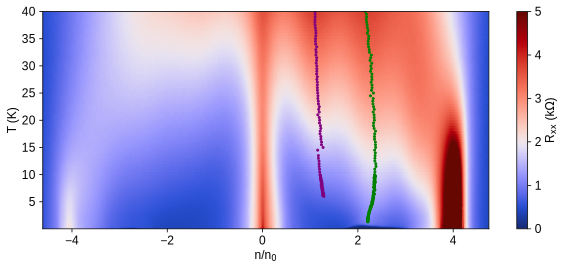

In [37]:
msize = 4

plt.figure(figsize=(10, 4))
plt.pcolormesh(nuT, T, Rxx3534/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(2, 0, 5), rasterized=True)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')

plt.plot(nuhalf, halfT, '.', ms=msize, color='green')
plt.plot(nuquarter, quarterT, '.', ms=msize, color='purple')

plt.xlabel('n/n$_0$')
plt.ylabel('T (K)')


# In-plane field dependence at different temperatures

All at 0 electric field

In [142]:
dhalf25mK = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_25mK.txt')
dhalf2p3K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_2p3K.txt')
dhalf5K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_5K.txt')
dhalf7p5K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_7p5K.txt')
dhalf12K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_12K.txt')
dhalf16K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_16K.txt')
dhalf22K = np.loadtxt(dfile + 'R3534_half_BvsVbgNu_22K.txt')
dhalfall = [dhalf25mK, dhalf2p3K, dhalf5K, dhalf7p5K, dhalf12K, dhalf16K, dhalf22K]

In [36]:
N = 7
cs = cc.cm.bmy([i/(N) for i in range(N)])

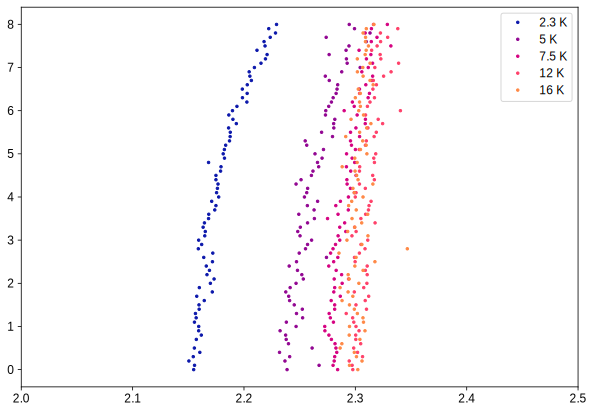

In [356]:
msize = 5
plt.figure(figsize=(10, 7))
# plt.plot(dhalf25mK[:, 2], dhalf25mK[:, 0], '.', ms=msize, label='25 mK', color=cs[0])
plt.plot(dhalf2p3K[:, 2], dhalf2p3K[:, 0], '.', ms=msize, label='2.3 K', color=cs[1])
plt.plot(dhalf5K[:, 2], dhalf5K[:, 0], '.', ms=msize, label='5 K', color=cs[2])
plt.plot(dhalf7p5K[:, 2], dhalf7p5K[:, 0], '.', ms=msize, label='7.5 K', color=cs[3])
plt.plot(dhalf12K[:, 2], dhalf12K[:, 0], '.', ms=msize, label='12 K', color=cs[4])
plt.plot(dhalf16K[:, 2], dhalf16K[:, 0], '.', ms=msize, label='16 K', color=cs[5])
# plt.plot(dhalf22K[:, 2], dhalf22K[:, 0], '.', ms=msize, label='22 K', color=cs[6])
plt.xlim(2, 2.5)

plt.legend()

In [45]:
dquart5K = np.loadtxt(dfile + 'R3534_quarter_BvsVbgNu_5K.txt')
dquart7p5K = np.loadtxt(dfile + 'R3534_quarter_BvsVbgNu_7p5K.txt')
dquart12K = np.loadtxt(dfile + 'R3534_quarter_BvsVbgNu_12K.txt')
dquart16K = np.loadtxt(dfile + 'R3534_quarter_BvsVbgNu_16K.txt')
dquart22K = np.loadtxt(dfile + 'R3534_quarter_BvsVbgNu_22K.txt')

dquartall = [dquart5K, dquart7p5K, dquart12K, dquart16K, dquart22K]

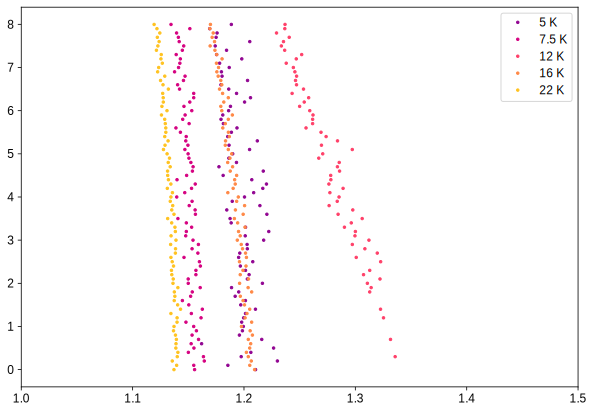

In [41]:
msize = 5
plt.figure(figsize=(10, 7))
plt.plot(dquart5K[:, 2], dquart5K[:, 0], '.', ms=msize, label='5 K', color=cs[2])
plt.plot(dquart7p5K[:, 2], dquart7p5K[:, 0], '.', ms=msize, label='7.5 K', color=cs[3])
plt.plot(dquart12K[:, 2], dquart12K[:, 0], '.', ms=msize, label='12 K', color=cs[4])
plt.plot(dquart16K[:, 2], dquart16K[:, 0], '.', ms=msize, label='16 K', color=cs[5])
plt.plot(dquart22K[:, 2], dquart22K[:, 0], '.', ms=msize, label='22 K', color=cs[6])
plt.xlim(1, 1.5)

plt.legend()

## Start with fitting 1/4 filling

In [322]:
def nufunc(B, T, dmu, de, dg):
    return 1/dmu*(de - 0.5*dg*T**2 - T*np.log(2*np.cosh(muB/kB*B/T)))

In [323]:
len(dquartall)

5

In [324]:
fpar = lmfit.Parameters()
fpar.add('dmu', value=64)
fpar.add('de', value=72)
fpar.add('dg', value=-0.03)
Tvals = [12, 16, 22]
def nures(pars):
    v = pars.valuesdict()
    res = []
    for i in range(len(Tvals)):
        T = Tvals[i]
        res.append(nufunc(dquartall[2+i][:, 0], T, v['dmu'], v['de'], v['dg']) - dquartall[2+i][:, 2])
        
    return res

In [325]:
mi = lmfit.minimize(nures, fpar, nan_policy='omit')

In [326]:
mi

In [327]:
mi.params.valuesdict()['dmu']

14.386141208194395

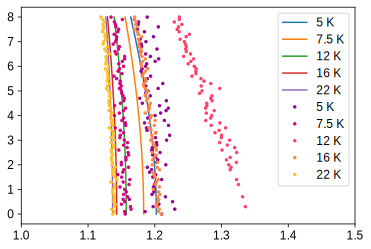

In [358]:
dmu, de, dg = 64, 80, -0.0331

# dmu, de, dg = mi.params['dmu'].value, mi.params['de'].value, mi.params['dg'].value


plt.figure()
b = np.linspace(0, 8, 50)
plt.plot(nufunc(b, 5, dmu, de, dg), b, label='5 K')
plt.plot(nufunc(b, 7.5, dmu, de, dg), b, label='7.5 K')
plt.plot(nufunc(b, 12, dmu, de, dg), b, label='12 K')
plt.plot(nufunc(b, 16, dmu, de, dg), b, label='16 K')
plt.plot(nufunc(b, 22, dmu, de, dg), b, label='22 K')
plt.xlim(1, 1.5)

plt.plot(dquart5K[:, 2], dquart5K[:, 0], '.', ms=msize, label='5 K', color=cs[2])
plt.plot(dquart7p5K[:, 2], dquart7p5K[:, 0], '.', ms=msize, label='7.5 K', color=cs[3])
plt.plot(dquart12K[:, 2], dquart12K[:, 0], '.', ms=msize, label='12 K', color=cs[4])
plt.plot(dquart16K[:, 2], dquart16K[:, 0], '.', ms=msize, label='16 K', color=cs[5])
plt.plot(dquart22K[:, 2], dquart22K[:, 0], '.', ms=msize, label='22 K', color=cs[6])
plt.legend()

## 1/2 filling fit

In [187]:
def nufunc(B, T, dmu, de, dg):  # switch the sign of the B-dependent term here
    return 1/dmu*(de - 0.5*dg*T**2 + T*np.log(2*np.cosh(muB/kB*B/T)))

In [188]:
len(dhalfall)

7

In [313]:
fpar = lmfit.Parameters()
fpar.add('dmu', value=60, min=10, max=90, vary=False)
fpar.add('de', value=72, min=10, max=90)
fpar.add('dg', value=-0.033, min=-0.04, max=0, vary=False)
Tvals = [12, 16, 22]

def nures(pars):
    v = pars.valuesdict()
    res = []
    for i in range(len(Tvals)):
        T = Tvals[i]
        res.append(nufunc(dhalfall[3+i][:, 0], T, v['dmu'], v['de'], v['dg']) - dhalfall[3+i][:, 2])
        
    return res

In [314]:
mi = lmfit.minimize(nures, fpar, nan_policy='omit', method='nelder')

In [315]:
mi

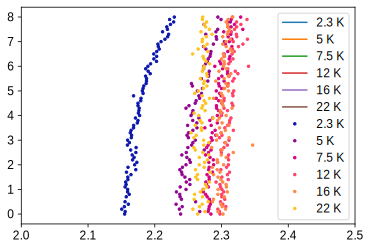

In [316]:
# dmu = 34
# de = 65
# dg = -0.035

dmu, de, dg = mi.params['dmu'].value, mi.params['de'].value, mi.params['dg'].value

plt.figure()
b = np.linspace(0, 8, 50)
plt.plot(nufunc(b, 2.3, dmu, de, dg), b, label='2.3 K')
plt.plot(nufunc(b, 5, dmu, de, dg), b, label='5 K')
plt.plot(nufunc(b, 7.5, dmu, de, dg), b, label='7.5 K')
plt.plot(nufunc(b, 12, dmu, de, dg), b, label='12 K')
plt.plot(nufunc(b, 16, dmu, de, dg), b, label='16 K')
plt.plot(nufunc(b, 22, dmu, de, dg), b, label='22 K')

plt.plot(dhalf2p3K[:, 2], dhalf2p3K[:, 0], '.', ms=msize, label='2.3 K', color=cs[1])
plt.plot(dhalf5K[:, 2], dhalf5K[:, 0], '.', ms=msize, label='5 K', color=cs[2])
plt.plot(dhalf7p5K[:, 2], dhalf7p5K[:, 0], '.', ms=msize, label='7.5 K', color=cs[3])
plt.plot(dhalf12K[:, 2], dhalf12K[:, 0], '.', ms=msize, label='12 K', color=cs[4])
plt.plot(dhalf16K[:, 2], dhalf16K[:, 0], '.', ms=msize, label='16 K', color=cs[5])
plt.plot(dhalf22K[:, 2], dhalf22K[:, 0], '.', ms=msize, label='22 K', color=cs[6])

plt.xlim(2, 2.5)
plt.legend()